In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_AE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101,2.80,NaN,0.30,2.81,NaN,1.03,3.17,NaN
3,14.37,1.95,2.50,16.8,113,3.85,NaN,0.24,2.18,7.80,0.86,NaN,NaN
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120,1.65,NaN,0.53,1.46,9.30,0.60,NaN,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	0
float64		column 3	0
float64		column 4	0
int64		column 5	0
float64		column 6	15
float64		column 7	21
float64		column 8	0
float64		column 9	15
float64		column 10	7
float64		column 11	0
float64		column 12	29
float64		column 13	21


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,178.000000,178.000000,178.000000,178.000000,178.000000,163.000000,157.000000,178.000000,163.000000,171.000000,178.000000,149.000000,157.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.299448,2.015096,0.361854,1.578098,5.005497,0.957449,2.599396,745.554140
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.630027,1.004411,0.124453,0.583790,2.313963,0.228572,0.736108,305.101253
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,290.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.730000,1.100000,0.270000,1.185000,3.190000,0.782500,1.830000,510.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.350000,2.110000,0.340000,1.540000,4.600000,0.965000,2.770000,672.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.860000,0.437500,1.950000,6.115000,1.120000,3.200000,970.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

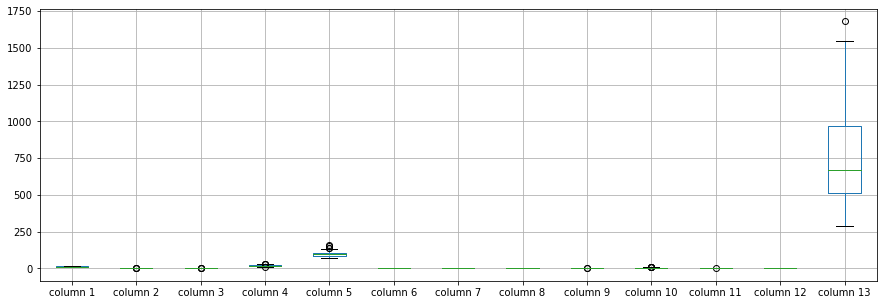

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.000618
column 2       2.336348
column 3       2.366517
column 4      19.494944
column 5      99.741573
column 6       2.299448
column 7       2.015096
column 8       0.361854
column 9       1.578098
column 10      5.005497
column 11      0.957449
column 12      2.599396
column 13    745.554140
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.094397,0.211545,-0.310235,0.270798,0.266154,0.251628,-0.155929,0.136838,0.536596,-0.071747,0.063346,0.626227
column 2,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.354886,-0.431058,0.292977,-0.242091,0.238885,-0.561296,-0.387934,-0.242280
column 3,0.211545,0.164045,1.000000,0.443367,0.286587,0.114977,0.089147,0.186230,0.030410,0.246575,-0.074667,-0.024978,0.193525
column 4,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.313862,-0.380273,0.361922,-0.191368,0.000480,-0.273955,-0.313331,-0.457149
column 5,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.199040,0.243270,-0.256294,0.255683,0.194057,0.055398,0.055721,0.370442
column 6,0.266154,-0.354886,0.114977,-0.313862,0.199040,1.000000,0.874065,-0.450996,0.623596,-0.062780,0.456143,0.720833,0.526258
column 7,0.251628,-0.431058,0.089147,-0.380273,0.243270,0.874065,1.000000,-0.559007,0.681008,-0.189669,0.561827,0.798540,0.506189
column 8,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.450996,-0.559007,1.000000,-0.398829,0.137101,-0.262640,-0.490969,-0.347105
column 9,0.136838,-0.242091,0.030410,-0.191368,0.255683,0.623596,0.681008,-0.398829,1.000000,-0.034852,0.315070,0.536286,0.352354
column 10,0.536596,0.238885,0.246575,0.000480,0.194057,-0.062780,-0.189669,0.137101,-0.034852,1.000000,-0.514447,-0.449280,0.296155


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+21,13+21+21,13+21+21,13+21+21+21+21,13+21+21+21+21+21,13+21+21+21+21+21+21,13+21+21+21+21+21,13+21+21+21+21,13+21+21+21,13+21+21,13+21,13], vae_layer = False, seed = 210)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 860.2526966441761
Epoch: 1 , loss: 858.3330244584517
Epoch: 2 , loss: 860.1522882634944
Epoch: 3 , loss: 862.0851995294744
Epoch: 4 , loss: 857.1060014204545
Epoch: 5 , loss: 863.4397139115767
Epoch: 6 , loss: 855.0609297318892
Epoch: 7 , loss: 852.1652221679688
Epoch: 8 , loss: 864.1901744495739
Epoch: 9 , loss: 855.3968172940341
Epoch: 10 , loss: 855.621337890625
Epoch: 11 , loss: 861.7498890269886
Epoch: 12 , loss: 856.5587269176136
Epoch: 13 , loss: 861.6387051669034
Epoch: 14 , loss: 859.8790893554688
Epoch: 15 , loss: 862.1584805575284
Epoch: 16 , loss: 862.1482044566761
Epoch: 17 , loss: 853.6546519886364
Epoch: 18 , loss: 861.2817327325994
Epoch: 19 , loss: 856.8722922585227
Epoch: 20 , loss: 859.728232643821
Epoch: 21 , loss: 857.991455078125
Epoch: 22 , loss: 855.7599542791194
Epoch: 23 , loss: 855.681318803267
Epoch: 24 , loss: 866.0128673206676
Epoch: 25 , loss: 862.8316040039062
Epoch: 26 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0,0.0,-1.359311,0.0,0.0,-1.682146,0.0,0.000000,-1180.280261
3,0.0,0.0,0.0,0.0,0,0.0,-2.285895,0.0,0.0,0.000000,0.0,-1.922185,-1477.154994
4,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
174,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
175,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
176,0.0,0.0,0.0,0.0,0,0.0,1.338534,0.0,0.0,0.000000,0.0,0.956456,-834.918539


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(3859.539071015443, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.3541485994012335

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.80,3.060000,0.28,2.29,5.640000,1.04,3.920000,1065.000000
1,13.20,1.78,2.14,11.2,100,2.65,2.760000,0.26,1.28,4.380000,1.05,3.400000,1050.000000
2,13.16,2.36,2.67,18.6,101,2.80,1.880689,0.30,2.81,3.997854,1.03,3.170000,4.719739
3,14.37,1.95,2.50,16.8,113,3.85,1.204105,0.24,2.18,7.800000,0.86,1.527815,2.845006
4,13.24,2.59,2.87,21.0,118,2.80,2.690000,0.39,1.82,4.320000,1.04,2.930000,735.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.610000,0.52,1.06,7.700000,0.64,1.740000,740.000000
174,13.40,3.91,2.48,23.0,102,1.80,0.750000,0.43,1.41,7.300000,0.70,1.560000,750.000000
175,13.27,4.28,2.26,20.0,120,1.59,0.690000,0.43,1.35,10.200000,0.59,1.560000,835.000000
176,13.17,2.59,2.37,20.0,120,1.65,2.018534,0.53,1.46,9.300000,0.60,2.576456,5.081461


In [20]:
imputations[-1].to_excel("Wine_AE_5(imp).xlsx", index=False, header=False)